In [1]:
import pandas as pd
import array as arr
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.integrate import odeint

In [2]:
data_exact = pd.read_excel("exact.xlsx")
del data_exact['Unnamed: 0']

In [3]:
time = []
for idx in range(0, data_exact.shape[0], 1):
    time.append(idx * 0.001)

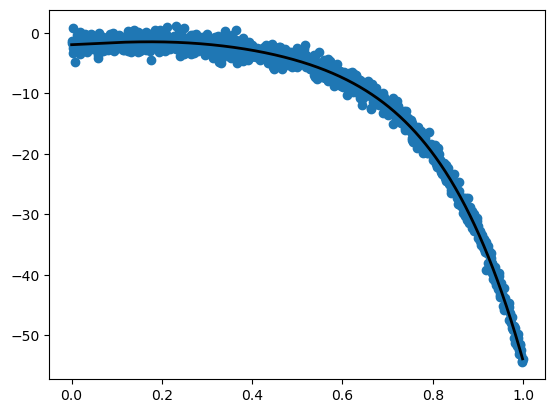

In [4]:
x = np.array([time]).T
y = np.array(data_exact['R'])

model_R = make_pipeline(PolynomialFeatures(5), LinearRegression())
model_R.fit(x, y)
model_R = model_R.predict(x)
plt.plot(x,y,'o')
plt.plot(x, model_R, '-', color = 'black', linewidth = 2)
plt.show()

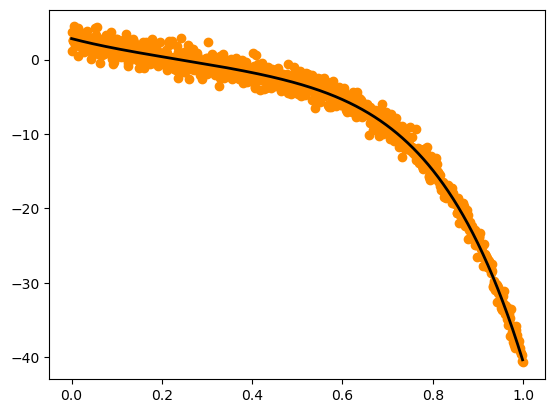

In [5]:
x = np.array([time]).T
y = np.array(data_exact['J'])

model_J = make_pipeline(PolynomialFeatures(5), LinearRegression())
model_J.fit(x, y)
model_J = model_J.predict(x)
plt.plot(x,y,'o', color = 'darkorange')
plt.plot(x, model_J, '-', color = 'black', linewidth = 2)
plt.show()

In [6]:
data_exact['R'] = model_R
data_exact['J'] = model_J

In [7]:
derivative_R = []
derivative_J = []

for idx in range(0, data_exact.shape[0] - 1, 1):
    derivative_R.append((data_exact['R'].iloc[idx + 1] - data_exact['R'].iloc[idx]) / 0.001)
    derivative_J.append((data_exact['J'].iloc[idx + 1] - data_exact['J'].iloc[idx]) / 0.001)

data_exact = data_exact.drop(labels=[data_exact.shape[0] - 1])

data_exact['R\''] = derivative_R
data_exact['J\''] = derivative_J

In [8]:
dependent_R = data_exact['R\'']
explanatory_R = data_exact[['R', 'J']]

results_mul = sm.OLS(dependent_R, explanatory_R).fit()

results_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     R'   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.205e+06
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:36:51   Log-Likelihood:                         -1339.3
No. Observations:                 999   AIC:                                      2683.
Df Residuals:                     997   BIC:                                      2692.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R              2.1743      0.016    133.538      0.000       2.142       2.206
J              3.7571      0.022    172.452      0.000       3.714       3.800
==============================================================================
Omnibus:                      139.525   Durbin-Watson:                   0.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.597
Skew:                           0.666   Prob(JB):                    5.83e-101
Kurtosis:                       6.052   Cond. No.                         19.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
dependent_J = data_exact['J\'']
explanatory_J = data_exact[['R', 'J']]

results_mul = sm.OLS(dependent_J, explanatory_J).fit()

results_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     J'   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.414e+06
Date:                Sun, 25 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:36:54   Log-Likelihood:                         -1603.2
No. Observations:                 999   AIC:                                      3210.
Df Residuals:                     997   BIC:                                      3220.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R              5.4217      0.021    255.660      0.000       5.380       5.463
J             -2.2445      0.028    -79.101      0.000      -2.300      -2.189
==============================================================================
Omnibus:                      141.796   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.984
Skew:                           0.899   Prob(JB):                     3.85e-54
Kurtosis:                       4.637   Cond. No.                         19.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
data_source = pd.read_excel("exact.xlsx")
del data_source['Unnamed: 0']

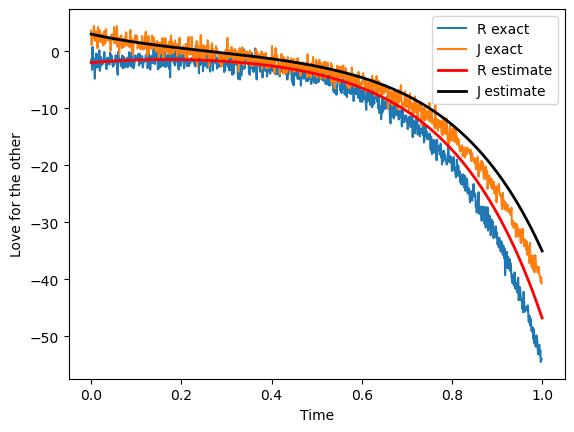

In [11]:
def model(u, t):
    x = u[0]
    y = u[1]
    dxdt = 2.1743*x + 3.7571*y
    dydt = 5.4217*x - 2.2445*y
    return [dxdt, dydt]
 
u0 = [-2, 3]
t = np.linspace(0, 1, 10000)

u = odeint(model, u0, t)

x = u[:, 0]
y = u[:, 1]

plt.plot(time, data_source['R'], '-', label = 'R exact')
plt.plot(time, data_source['J'], '-', label = 'J exact')

plt.plot(t, x, 'r-', linewidth = 2, label = 'R estimate')
plt.plot(t, y, 'k-', linewidth = 2, label = 'J estimate')

plt.xlabel('Time')
plt.ylabel('Love for the other')
plt.legend()

plt.show()

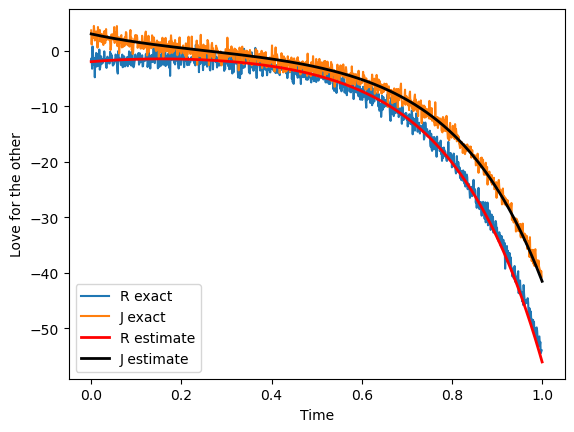

In [14]:
def model(u, t):
    x = u[0]
    y = u[1]
    dxdt = 2.3*x + 3.8*y
    dydt = 5.5*x - 2.3*y
    return [dxdt, dydt]
 
u0 = [-2, 3]
t = np.linspace(0, 1, 10000)

u = odeint(model, u0, t)

x = u[:, 0]
y = u[:, 1]

plt.plot(time, data_source['R'], '-', label = 'R exact')
plt.plot(time, data_source['J'], '-', label = 'J exact')

plt.plot(t, x, 'r-', linewidth = 2, label = 'R estimate')
plt.plot(t, y, 'k-', linewidth = 2, label = 'J estimate')

plt.xlabel('Time')
plt.ylabel('Love for the other')
plt.legend()

plt.show()